## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
ab = pd.read_csv('ab_data.csv')
ab.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
ab.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
ab['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
ab['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
new_1 = ab[(ab.group == 'control') & (ab.landing_page == 'new_page')]
new_1.count()

user_id         1928
timestamp       1928
group           1928
landing_page    1928
converted       1928
dtype: int64

In [7]:
new_2 = ab[(ab.group == 'treatment') & (ab.landing_page == 'old_page')]
new_2.count()

user_id         1965
timestamp       1965
group           1965
landing_page    1965
converted       1965
dtype: int64

In [8]:
new_1.count() + new_2.count()

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

f. Do any of the rows have missing values?

In [9]:
ab.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
new_1 = ab[(ab.group == 'control') & (ab.landing_page == 'old_page')]
new_2 = ab[(ab.group == 'treatment') & (ab.landing_page == 'new_page')]


In [11]:
#Concat 
df2 = pd.concat([new_1,new_2], keys=['control','treatment'], axis = 0)
df2.reset_index(drop=True)


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,864975,2017-01-21 01:52:26.210827,control,old_page,1
3,936923,2017-01-10 15:20:49.083499,control,old_page,0
4,719014,2017-01-17 01:48:29.539573,control,old_page,0
5,644214,2017-01-22 02:05:21.719434,control,old_page,1
6,847721,2017-01-17 14:01:00.090575,control,old_page,0
7,650559,2017-01-24 11:55:51.084801,control,old_page,0
8,935734,2017-01-17 20:33:37.428378,control,old_page,0
9,746742,2017-01-23 11:38:29.592148,control,old_page,0


In [12]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [13]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

source: https://stackoverflow.com/questions/14657241/how-do-i-get-a-list-of-all-the-duplicate-items-using-pandas-in-python

c. What is the row information for the repeat **user_id**? 

In [14]:
df2[df2.duplicated(subset = ['user_id'], keep=False)]


user_id                   timestamp      group landing_page  \
treatment 1899   773192  2017-01-09 05:37:58.781806  treatment     new_page   
          2893   773192  2017-01-14 02:55:59.590927  treatment     new_page   

                converted  
treatment 1899          0  
          2893          0

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
df2 = df2.drop_duplicates(subset = ['user_id'],keep = 'last')
df2

user_id                   timestamp      group landing_page  \
control   0        851104  2017-01-21 22:11:48.556739    control     old_page   
          1        804228  2017-01-12 08:01:45.159739    control     old_page   
          4        864975  2017-01-21 01:52:26.210827    control     old_page   
          5        936923  2017-01-10 15:20:49.083499    control     old_page   
          7        719014  2017-01-17 01:48:29.539573    control     old_page   
          15       644214  2017-01-22 02:05:21.719434    control     old_page   
          16       847721  2017-01-17 14:01:00.090575    control     old_page   
          18       650559  2017-01-24 11:55:51.084801    control     old_page   
          19       935734  2017-01-17 20:33:37.428378    control     old_page   
          25       746742  2017-01-23 11:38:29.592148    control     old_page   
          28       913579  2017-01-24 09:11:39.164256    control     old_page   
          30       690284  2017-01-13 17:22:57.182769    control     old_page   
          34       710349  2017-01-11 22:24:44.226492    control     old_page   
          35       677533  2017-01-23 17:48:50.491821    control     old_page   
          36       831737  2017-01-11 21:18:20.911015    control     old_page   
          40       771087  2017-01-16 00:05:29.983919    control     old_page   
          42       896163  2017-01-22 09:10:20.753218    control     old_page   
          43       862225  2017-01-08 14:49:37.335432    control     old_page   
          44       939593  2017-01-05 09:15:31.984283    control     old_page   
          45       702260  2017-01-18 13:55:31.488221    control     old_page   
          50       670941  2017-01-05 08:16:41.306478    control     old_page   
          51       850231  2017-01-18 17:18:04.790584    control     old_page   
          55       685794  2017-01-20 14:54:58.150621    control     old_page   
          57       714733  2017-01-03 08:22:37.904146    control     old_page   
          58       710967  2017-01-10 02:19:22.842142    control     old_page   
          59       680201  2017-01-11 10:38:45.952887    control     old_page   
          60       790863  2017-01-19 11:02:39.220320    control     old_page   
          61       717595  2017-01-23 18:19:08.148166    control     old_page   
          62       779854  2017-01-11 21:28:30.735359    control     old_page   
          63       916307  2017-01-19 17:27:38.676600    control     old_page   
...                   ...                         ...        ...          ...   
treatment 294417   924332  2017-01-15 19:38:52.858024  treatment     new_page   
          294422   849625  2017-01-06 17:54:07.563311  treatment     new_page   
          294424   929723  2017-01-10 15:13:48.352399  treatment     new_page   
          294427   774769  2017-01-03 06:01:36.251836  treatment     new_page   
          294430   733871  2017-01-21 17:54:08.810964  treatment     new_page   
          294432   844588  2017-01-16 20:48:19.567178  treatment     new_page   
          294433   641244  2017-01-07 16:57:26.193171  treatment     new_page   
          294434   676072  2017-01-14 17:26:02.495442  treatment     new_page   
          294435   886374  2017-01-07 13:43:39.202634  treatment     new_page   
          294437   676732  2017-01-03 23:06:45.459467  treatment     new_page   
          294439   862218  2017-01-04 10:43:07.846494  treatment     new_page   
          294441   798826  2017-01-23 16:50:13.788528  treatment     new_page   
          294442   836721  2017-01-12 17:37:50.966955  treatment     new_page   
          294444   844901  2017-01-15 17:46:36.622726  treatment     new_page   
          294445   653124  2017-01-14 13:44:51.745491  treatment     new_page   
          294446   909437  2017-01-18 14:49:49.064452  treatment     new_page   
          294448   776137  2017-01-12 05:53:12.386730  treatment     new_page   
          294449   883344  2017-01-22 23:15:58.64

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

souce: https://stackoverflow.com/questions/36684013/extract-column-value-based-on-another-column-pandas-dataframe

In [17]:
df2[df2['group'] == 'control']['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
df2[df2['group'] == 'treatment']['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [19]:
df2.shape

(290584, 5)

In [20]:
len(df2.query("landing_page == 'new_page'"))

145310

In [21]:
145311/290585

0.5000636646764286

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

**
While comparing treatment and control, it turns out that control scored higher than treatment. 
I guess it is hard to tell that one page leads to more conversion because the probability that   the individual received the page is 0.5. 
**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

source: https://matplotlib.org/users/mathtext.html

**Ho : Pold > Pnew **

**Ho: Pold = Pnew **

**H1 : Pold < Pnew **


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [22]:
Pnew = df2.converted.mean()
Pnew

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

source: https://stackoverflow.com/questions/15943769/how-do-i-get-the-row-count-of-a-pandas-dataframe

In [23]:
Pold = df2.converted.mean()
Pold

0.11959708724499628

c. What is $n_{new}$?

In [24]:
nnew = df2.query('landing_page == "new_page"').shape[0] 
nnew

145310

d. What is $n_{old}$?

In [25]:
nold = df2.query('landing_page == "old_page"').shape[0] #147239
nold

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

source: 

In [26]:
new_page_converted = np.random.binomial(1, Pnew, nnew)
new_page_converted

array([0, 0, 0, ..., 0, 1, 0])

In [27]:
npc = new_page_converted.mean()
npc

0.11911774826233569

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [28]:
old_page_converted = np.random.binomial(1, Pold, nold)
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
opc = old_page_converted.mean()
opc

0.12007654501149552

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [30]:
#simulated diff
npc - opc

-0.0009587967491598293

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [31]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(1, Pnew, nnew)
    old_page_converted = np.random.binomial(1, Pold, nold)
    npc = new_page_converted.mean()
    opc = old_page_converted.mean()
    diff = npc - opc
    p_diffs.append(diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

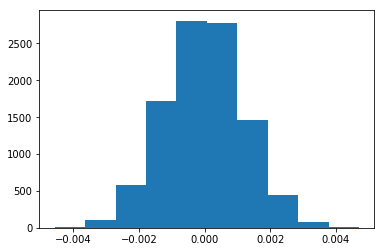

In [32]:
plt.hist(p_diffs);


j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [33]:
#Display again the converted control group
control = df2[df2['group'] == 'control']['converted'].mean()
control

0.1203863045004612

In [34]:
#Display again the converted treatment group
treatment = df2[df2['group'] == 'treatment']['converted'].mean()
treatment

0.11880806551510564

In [35]:
#Get obs_diff
obs_diff = treatment - control
obs_diff

-0.0015782389853555567

In [36]:
#Display the differences 
obs_diff

-0.0015782389853555567

In [37]:
#Turning them into float to allow me to use these < 0r >
obs_diff= np.array(obs_diff).astype(float)
obs_diff

array(-0.00157824)

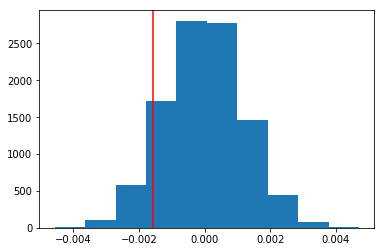

In [38]:
#Plot proportion of the p_diffs are greater than the actual difference observed 

plt.hist(p_diffs);
plt.axvline(x=obs_diff, color='red');

In [39]:
#Just experimenting [ignore this]
(p_diffs < obs_diff).mean()

0.0942

In [40]:
#proportion of the p_diffs are greater than the actual difference observed 
(p_diffs > obs_diff).mean()#<---- This is the answer

0.9058

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Ho: Pnew - Pold =< 0**

**H1: Pnew - Pold > 0**

**
Rejecting null value should be equal to or less than the alpha (0.05); therefore, it is scientifically significant. In this case, the p-value is equal 0.9021 or 90.21% chance of being p_diffs. If the p-value is greater than alpha (0.05) or (0.01), it does not reject the null. It means that it is not scientifically significant.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [41]:
import statsmodels.api as sm

#Get convert_new
convert_new = df2.query("landing_page == 'new_page' and converted == 1").shape[0]
n_new = df2.query("landing_page == 'new_page'").shape[0]

#Get convert_old
convert_old = df2.query("landing_page == 'old_page' and converted == 1").shape[0]
n_old = df2.query("landing_page == 'old_page'").shape[0]


C:\Users\Alexander Smith\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [42]:
count = np.array([convert_old, convert_new])
nobs = np.array([n_old, n_new])

source: https://www.statsmodels.org/dev/generated/statsmodels.stats.proportion.proportions_ztest.html

In [43]:
z_score, p_value = sm.stats.proportions_ztest(count, nobs, alternative = 'smaller')
z_score, p_value

(1.3109241984234394, 0.9050583127590245)

source: http://www.statsmodels.org/dev/generated/statsmodels.stats.proportion.proportions_ztest.html

In [44]:
#Similar to the simulation
print('{0:0.4f}'.format(p_value))

0.9051


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

source: http://resources.esri.com/help/9.3/arcgisdesktop/com/gp_toolref/spatial_statistics_toolbox/what_is_a_z_score_what_is_a_p_value.htm

**The p-value associated with a 95% confidence level is 0.05. If [our] Z score is between -1.96 and +1.96, [our] p-value will be larger than 0.05, and you cannot reject your null hypothsis; the pattern exhibited is a pattern that could very likely be one version of a random pattern(http://resources.esri.com). In this case our z-score is equal to 1.3109, which falls within -1.96 and 1.96. Therefore, we fail to reject the null.** 

**J and K: Different method and both fail to reject the null. Also, they compliment each other because they have similar p-values. ** 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**I am going to use a logistic regression method.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

source: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html

In [45]:
#I know this is weird but Please do not delete this because it would cause some error. 
df2['intercept'] = 1
df2['ab_page'] = pd.get_dummies(['group'])
df2

user_id                   timestamp      group landing_page  \
control   0        851104  2017-01-21 22:11:48.556739    control     old_page   
          1        804228  2017-01-12 08:01:45.159739    control     old_page   
          4        864975  2017-01-21 01:52:26.210827    control     old_page   
          5        936923  2017-01-10 15:20:49.083499    control     old_page   
          7        719014  2017-01-17 01:48:29.539573    control     old_page   
          15       644214  2017-01-22 02:05:21.719434    control     old_page   
          16       847721  2017-01-17 14:01:00.090575    control     old_page   
          18       650559  2017-01-24 11:55:51.084801    control     old_page   
          19       935734  2017-01-17 20:33:37.428378    control     old_page   
          25       746742  2017-01-23 11:38:29.592148    control     old_page   
          28       913579  2017-01-24 09:11:39.164256    control     old_page   
          30       690284  2017-01-13 17:22:57.182769    control     old_page   
          34       710349  2017-01-11 22:24:44.226492    control     old_page   
          35       677533  2017-01-23 17:48:50.491821    control     old_page   
          36       831737  2017-01-11 21:18:20.911015    control     old_page   
          40       771087  2017-01-16 00:05:29.983919    control     old_page   
          42       896163  2017-01-22 09:10:20.753218    control     old_page   
          43       862225  2017-01-08 14:49:37.335432    control     old_page   
          44       939593  2017-01-05 09:15:31.984283    control     old_page   
          45       702260  2017-01-18 13:55:31.488221    control     old_page   
          50       670941  2017-01-05 08:16:41.306478    control     old_page   
          51       850231  2017-01-18 17:18:04.790584    control     old_page   
          55       685794  2017-01-20 14:54:58.150621    control     old_page   
          57       714733  2017-01-03 08:22:37.904146    control     old_page   
          58       710967  2017-01-10 02:19:22.842142    control     old_page   
          59       680201  2017-01-11 10:38:45.952887    control     old_page   
          60       790863  2017-01-19 11:02:39.220320    control     old_page   
          61       717595  2017-01-23 18:19:08.148166    control     old_page   
          62       779854  2017-01-11 21:28:30.735359    control     old_page   
          63       916307  2017-01-19 17:27:38.676600    control     old_page   
...                   ...                         ...        ...          ...   
treatment 294417   924332  2017-01-15 19:38:52.858024  treatment     new_page   
          294422   849625  2017-01-06 17:54:07.563311  treatment     new_page   
          294424   929723  2017-01-10 15:13:48.352399  treatment     new_page   
          294427   774769  2017-01-03 06:01:36.251836  treatment     new_page   
          294430   733871  2017-01-21 17:54:08.810964  treatment     new_page   
          294432   844588  2017-01-16 20:48:19.567178  treatment     new_page   
          294433   641244  2017-01-07 16:57:26.193171  treatment     new_page   
          294434   676072  2017-01-14 17:26:02.495442  treatment     new_page   
          294435   886374  2017-01-07 13:43:39.202634  treatment     new_page   
          294437   676732  2017-01-03 23:06:45.459467  treatment     new_page   
          294439   862218  2017-01-04 10:43:07.846494  treatment     new_page   
          294441   798826  2017-01-23 16:50:13.788528  treatment     new_page   
          294442   836721  2017-01-12 17:37:50.966955  treatment     new_page   
          294444   844901  2017-01-15 17:46:36.622726  treatment     new_page   
          294445   653124  2017-01-14 13:44:51.745491  treatment     new_page   
          294446   909437  2017-01-18 14:49:49.064452  treatment     new_page   
          294448   776137  2017-01-12 05:53:12.386730  treatment     new_page   
          294449   883344  2017-01-22 23:15:58.64

In [46]:
df2['intercept'] = 1
df2['ab_page'] = pd.get_dummies(df2['group'])
df2

user_id                   timestamp      group landing_page  \
control   0        851104  2017-01-21 22:11:48.556739    control     old_page   
          1        804228  2017-01-12 08:01:45.159739    control     old_page   
          4        864975  2017-01-21 01:52:26.210827    control     old_page   
          5        936923  2017-01-10 15:20:49.083499    control     old_page   
          7        719014  2017-01-17 01:48:29.539573    control     old_page   
          15       644214  2017-01-22 02:05:21.719434    control     old_page   
          16       847721  2017-01-17 14:01:00.090575    control     old_page   
          18       650559  2017-01-24 11:55:51.084801    control     old_page   
          19       935734  2017-01-17 20:33:37.428378    control     old_page   
          25       746742  2017-01-23 11:38:29.592148    control     old_page   
          28       913579  2017-01-24 09:11:39.164256    control     old_page   
          30       690284  2017-01-13 17:22:57.182769    control     old_page   
          34       710349  2017-01-11 22:24:44.226492    control     old_page   
          35       677533  2017-01-23 17:48:50.491821    control     old_page   
          36       831737  2017-01-11 21:18:20.911015    control     old_page   
          40       771087  2017-01-16 00:05:29.983919    control     old_page   
          42       896163  2017-01-22 09:10:20.753218    control     old_page   
          43       862225  2017-01-08 14:49:37.335432    control     old_page   
          44       939593  2017-01-05 09:15:31.984283    control     old_page   
          45       702260  2017-01-18 13:55:31.488221    control     old_page   
          50       670941  2017-01-05 08:16:41.306478    control     old_page   
          51       850231  2017-01-18 17:18:04.790584    control     old_page   
          55       685794  2017-01-20 14:54:58.150621    control     old_page   
          57       714733  2017-01-03 08:22:37.904146    control     old_page   
          58       710967  2017-01-10 02:19:22.842142    control     old_page   
          59       680201  2017-01-11 10:38:45.952887    control     old_page   
          60       790863  2017-01-19 11:02:39.220320    control     old_page   
          61       717595  2017-01-23 18:19:08.148166    control     old_page   
          62       779854  2017-01-11 21:28:30.735359    control     old_page   
          63       916307  2017-01-19 17:27:38.676600    control     old_page   
...                   ...                         ...        ...          ...   
treatment 294417   924332  2017-01-15 19:38:52.858024  treatment     new_page   
          294422   849625  2017-01-06 17:54:07.563311  treatment     new_page   
          294424   929723  2017-01-10 15:13:48.352399  treatment     new_page   
          294427   774769  2017-01-03 06:01:36.251836  treatment     new_page   
          294430   733871  2017-01-21 17:54:08.810964  treatment     new_page   
          294432   844588  2017-01-16 20:48:19.567178  treatment     new_page   
          294433   641244  2017-01-07 16:57:26.193171  treatment     new_page   
          294434   676072  2017-01-14 17:26:02.495442  treatment     new_page   
          294435   886374  2017-01-07 13:43:39.202634  treatment     new_page   
          294437   676732  2017-01-03 23:06:45.459467  treatment     new_page   
          294439   862218  2017-01-04 10:43:07.846494  treatment     new_page   
          294441   798826  2017-01-23 16:50:13.788528  treatment     new_page   
          294442   836721  2017-01-12 17:37:50.966955  treatment     new_page   
          294444   844901  2017-01-15 17:46:36.622726  treatment     new_page   
          294445   653124  2017-01-14 13:44:51.745491  treatment     new_page   
          294446   909437  2017-01-18 14:49:49.064452  treatment     new_page   
          294448   776137  2017-01-12 05:53:12.386730  treatment     new_page   
          294449   883344  2017-01-22 23:15:58.64

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [47]:
import statsmodels.api as sm

In [48]:
logit = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [49]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 16 Sep 2018   Pseudo R-squ.:               8.077e-06
Time:                        10:10:30   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0038      0.008   -247.146      0.000      -2.020      -1.988
ab_page        0.0150      0.011      1.311      0.190      -0.007       0.037
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Ho: Pnew - Pold =< 0**

**H1: Pnew - Pold > 0**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

** I guess it would be interesting to see the correlation between participants' behaviors towards the web page colors. We could check their genders and main reasons why they need to use our website -- for example a child wants to play video game in our website to make friends, have fun, and other reasons. The main advantage is that it would help us to get some ideas or make decision to attract more viewers to click our website.**

**The main problem to add more additional terms in my regression model, it would look awkward and messy. Again, correlation is not causation. It is all about relationship between two variables.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [50]:
#Read and display countries.csv.; Notice that country consists UK and US
countries = pd.read_csv('countries.csv')
countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [51]:
#Inner join two datas
new = countries.set_index('user_id').join(df2.set_index('user_id'), how = 'inner')
new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0


In [52]:
#adding dummy variables with 'CA' as the baseline
new[['US', 'UK']] = pd.get_dummies(new['country'])[['US', "UK"]]
new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,US,UK
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,0,1


In [53]:
new['US_ab_page'] = new['US']*new['ab_page']
new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,US,UK,US_ab_page
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,0,1,0


In [54]:
new['UK_ab_page'] = new['UK']*new['ab_page']
new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,US,UK,US_ab_page,UK_ab_page
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,1,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,0,1,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,1,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,0,1,0,0


In [55]:
logit3 = sm.Logit(new['converted'], new[['intercept', 'ab_page', 'US', 'UK', 'US_ab_page', 'US_ab_page']])
logit3

In [56]:
#Check the result
result3 = logit3.fit()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [57]:
result3.summary()

C:\Users\Alexander Smith\Anaconda3\lib\site-packages\statsmodels\base\model.py:1029: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))
C:\Users\Alexander Smith\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Alexander Smith\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Alexander Smith\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            4
Date:                Sun, 16 Sep 2018   Pseudo R-squ.:               2.589e-05
Time:                        10:10:33   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.2390
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0384      0.028    -72.811      0.000      -2.093      -1.984
ab_page        0.0018      0.021      0.086      0.931      -0.039       0.043
US             0.0314      0.030      1.059      0.289      -0.027       0.089
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
US_ab_page     0.0094        nan        nan        nan         nan         nan
US_ab_page     0.0094        nan        nan        nan         nan         nan
==============================================================================
"""

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  This is the final project in Term 1.  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [58]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0